In [1]:
import csv
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

In [2]:
data = pd.read_csv('data.csv')
print("readed")

readed


In [3]:
#convert each label into numerical representation
data['label_id'] = data['label'].factorize()[0]

label_id_data = data[['label', 'label_id']].drop_duplicates().sort_values('label_id')
label_to_id = dict(label_id_data.values)
id_to_label = dict(label_id_data[['label_id', 'label']].values)

In [4]:
#Fine most correlated terms in each document by term frequency-inverse document frequency
tf_idf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 3), stop_words='english')

features = tf_idf.fit_transform(data.content).toarray()
labels = data.label_id
features.shape

(13328, 91456)

In [ ]:
#The output terms are the most correlated with each of the categories in unigram, bigram, and trigram:
N = 3
for label, label_id in label_to_id.items():
  features_chi2 = chi2(features, labels == label_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tf_idf.get_feature_names())[indices]

  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  trigrams = [v for v in feature_names if len(v.split(' ')) == 3]

  print("# '{}':".format(label))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))
  print("  . Most correlated trigrams:\n       . {}".format('\n       . '.join(trigrams[-N:])))


# 'acq':
  . Most correlated unigrams:
       . stake
       . acquisition
       . shares
  . Most correlated bigrams:
       . said acquired
       . said agreed
       . tender offer
  . Most correlated trigrams:
       . pct total outstanding
       . filing securities exchange
       . securities exchange commission
# 'alum':
  . Most correlated unigrams:
       . alcan
       . aluminum
       . aluminium
  . Most correlated bigrams:
       . alcan aluminium
       . primary aluminum
       . aluminium output
  . Most correlated trigrams:
       . manuel azpurua said
       . london metal exchange
       . metal exchange lme
# 'barley':
  . Most correlated unigrams:
       . licences
       . ecus
       . barley
  . Most correlated bigrams:
       . barley saudi
       . 138 75
       . tonnes barley
  . Most correlated trigrams:
       . barley saudi arabia
       . 138 75 ecus
       . 000 tonnes barley
# 'bop':
  . Most correlated unigrams:
       . surplus
       . deficit
 

# 'groundnut-oil':
  . Most correlated unigrams:
       . fishoil
       . soyabeans
       . pollard
  . Most correlated bigrams:
       . bearing raw
       . oil basis
       . fat oil
  . Most correlated trigrams:
       . bearing raw materials
       . fat oil basis
       . tonnes actual weight
# 'heat':
  . Most correlated unigrams:
       . gallon
       . harbor
       . heating
  . Most correlated bigrams:
       . heating oil
       . barge price
       . contract barge
  . Most correlated trigrams:
       . charges contract barge
       . contract barge price
       . contract barge customers
# 'hog':
  . Most correlated unigrams:
       . guesstimated
       . slaughter
       . hog
  . Most correlated bigrams:
       . 000 head
       . cattle slaughter
       . head versus
  . Most correlated trigrams:
       . cattle slaughter guesstimated
       . 000 week ago
       . 000 head versus
# 'housing':
  . Most correlated unigrams:
       . starts
       . completions
     

# 'orange':
  . Most correlated unigrams:
       . fcoj
       . juice
       . orange
  . Most correlated bigrams:
       . concentrated orange
       . frozen concentrated
       . orange juice
  . Most correlated trigrams:
       . estimates 1986 87
       . concentrated orange juice
       . frozen concentrated orange
# 'palladium':
  . Most correlated unigrams:
       . technigen
       . platinum
       . palladium
  . Most correlated bigrams:
       . 230 230
       . platinum corp
       . technigen platinum
  . Most correlated trigrams:
       . results 13 hole
       . palladium pct copper
       . technigen platinum corp
# 'palm-oil':
  . Most correlated unigrams:
       . rbd
       . olein
       . palm
  . Most correlated bigrams:
       . refined bleached
       . palm olein
       . palm oil
  . Most correlated trigrams:
       . tonnes refined bleached
       . refined bleached deodorised
       . bleached deodorised palm
# 'palmkernel':
  . Most correlated unigrams:
 

In [6]:
#Fine most correlated terms in each document by term frequency-inverse document frequency
slice_data = pd.read_csv('data.csv', nrows=12314)

#convert each label into numerical representation
slice_data['label_id'] = slice_data['label'].factorize()[0]
label_id_data = slice_data[['label', 'label_id']].drop_duplicates().sort_values('label_id')
label_to_id = dict(label_id_data.values)
id_to_label = dict(label_id_data[['label_id', 'label']].values)
#Fine most correlated terms in each document by term frequency-inverse document frequency
tf_idf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 3), stop_words='english')

features = tf_idf.fit_transform(slice_data.content).toarray()
labels = slice_data.label_id
features.shape


(12314, 75999)

IndexError: list index out of range

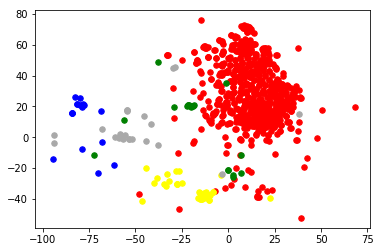

In [7]:
#plot 
SAMPLE_SIZE = int(len(features) * 0.)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)
projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices])
colors = ['red', 'green', 'blue', 'yellow', 'darkgrey']
for lbl, label_id in sorted(label_to_id.items()):
    points = projected_features[(labels[indices] == label_id).values]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[label_id], label=lbl)
plt.title("most correlated words illustration",
          fontdict=dict(fontsize=15))
plt.legend()

In [ ]:
#reference:https://colab.research.google.com/drive/1JW2I6cU_ypfRXfIfqMPQwMEA6LzGav-Y#scrollTo=kRviyvPXec-K